In [1]:
from isochrones.priors import ChabrierPrior
import numpy as np
from isochrones import get_ichrone
import matplotlib.pyplot as plt

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


In [2]:
bandlist = ['WFC3_UVIS_F275W','ACS_WFC_F435W','ACS_WFC_F606W','ACS_WFC_F814W','F090W','WFC3_IR_F105W','F115W','WFC3_IR_F125W','F150W','WFC3_IR_F160W',\
            'F200W','F277W','F356W','F444W']
tracks = get_ichrone('mist', bands=bandlist,tracks=True)
mass, age, feh = (1.00, 9.66, 0.0182)    ## metalicity is solar scaled.
a1=tracks.generate(mass, age, feh,return_dict=True)

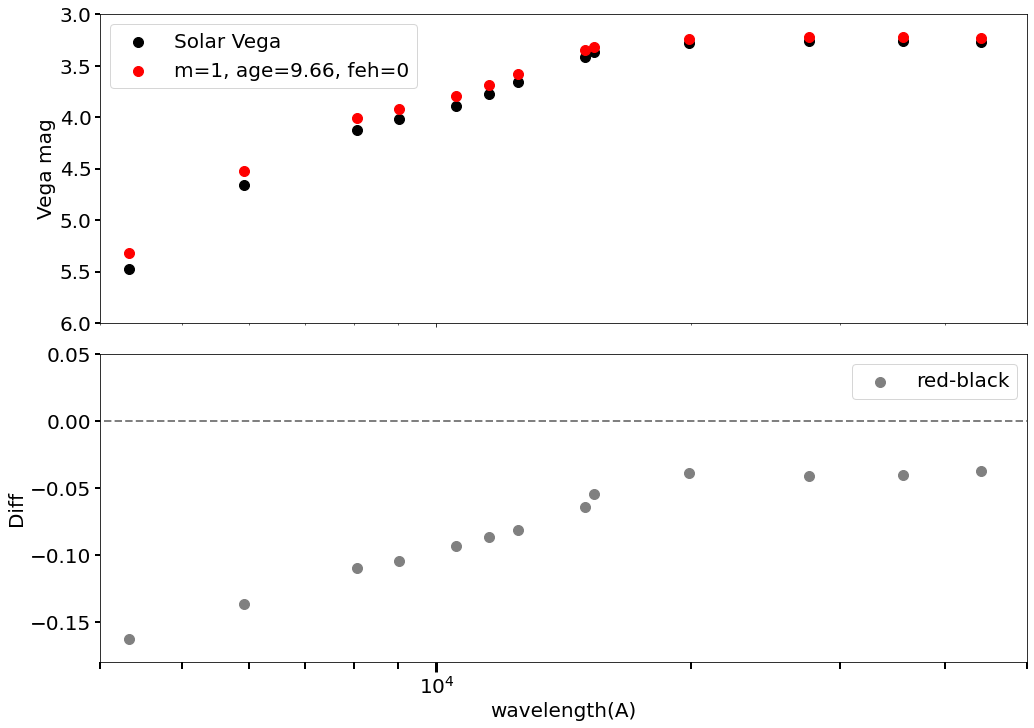

In [3]:
#magnitudes and wavelength from https://mips.as.arizona.edu/~cnaw/sun.html
solarmaglist =np.array([-99,5.48,4.66,4.12,4.02,3.89,3.77,3.66,3.41,3.37,3.28,3.26,3.26,3.27])
ww = np.array([-99,0.4328,0.5922,0.8059,0.9025,1.0551,1.1543,1.2486,1.5007,1.5370,1.9886,2.7618,3.5684,4.4040])*10000

fig, ax = plt.subplots(figsize=(16,12), nrows = 2, ncols=1,sharex=True)
plt.subplots_adjust(top=0.9,bottom=0.15,left=0.12,right=0.925,hspace=0.1,wspace=0.)
axes=ax.flatten()

aout = np.zeros(len(ww))
aout[0]=-99
for ii in range(len(ww)-1):
    key = bandlist[ii+1]+'_mag'
    aout[ii+1]=a1[key]
    
axes[0].scatter(ww,solarmaglist,s=100,color='black',label='Solar Vega') 
axes[0].scatter(ww,aout,s=100,color='red',label='m=1, age=9.66, feh=0')
axes[1].scatter(ww,aout-solarmaglist,s=100,color='gray',label='red-black')

axes[0].legend(fontsize=20)
axes[1].legend(fontsize=20)
axes[1].set_xlim(4000,50000)
axes[1].set_xscale('log')
axes[0].set_ylim(6,3)
axes[1].set_ylim(-0.18,0.05)
X=(3500,70000)
Y=(0,0)
axes[1].plot(X,Y,color='gray',linestyle='--',linewidth=2)
axes[1].set_xlabel('wavelength(A)',fontsize=20)
axes[0].set_ylabel('Vega mag',fontsize=20)
axes[1].set_ylabel('Diff',fontsize=20)
axes[1].tick_params(axis= 'x',which='major', width=3, length=10, labelsize=20)
axes[1].tick_params(axis= 'x',which='minor', width=2, length=7, labelsize=20)
axes[0].tick_params(axis= 'y',which='major', width=2, length=5, labelsize=20)
axes[1].tick_params(axis= 'y',which='major', width=2, length=5, labelsize=20)